In [4]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\user\Desktop\AIML_Timeseries\week1\testset.csv")
data.head()

,datetime,Temperature
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


In [5]:
#data['datetime'] = pd.to_datetime(data['datetime'].apply(lambda x: datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")))
data['datetime']=data['datetime'].apply(lambda x: datetime.strptime(x,"%Y%m%d-%H:%M"))
data=data.set_index('datetime')
data=data['2001':]
data.head()
#data.iloc[0,0]

,Temperature
datetime,
2001-01-01 00:30:00,14.0
2001-01-01 01:30:00,13.0
2001-01-01 02:30:00,13.0
2001-01-01 03:30:00,13.0
2001-01-01 04:30:00,13.0


In [6]:
#newdata = data.resample('M').mean().interpolate()
#data1=newdata.groupby(newdata.index.year).mean()
#newdata['Year'] = newdata.index.year
#newdata['Month'] = newdata.index.month
#newdata.head()
newdata = data.resample('M').mean()
newdata.head()

,Temperature
datetime,
2001-01-31,12.568436
2001-02-28,18.241270
2001-03-31,23.494737
2001-04-30,29.781388
2001-05-31,33.019526


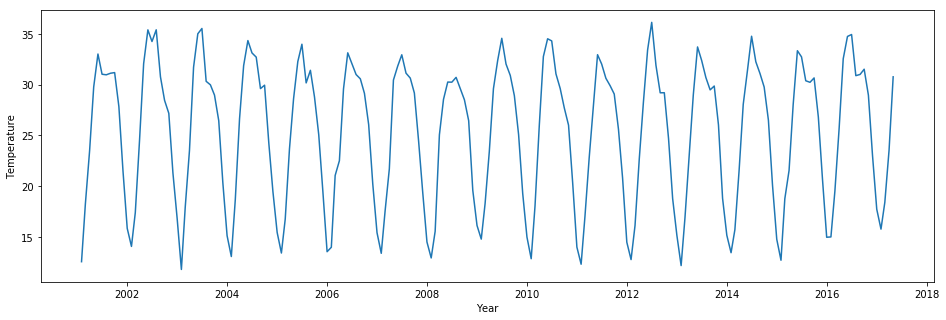

In [7]:
plt.figure(figsize=(16,5))
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.plot(newdata)

In [8]:
#series = pd.read_csv(r"C:\Users\srtpa\Downloads\datasets_1057_1913_AirPassengers.csv", header=0, index_col=0,
#parse_dates=True, squeeze=True)
#temps = DataFrame(series.values)
from pandas import concat
#dataframe = concat([temps.shift(1), temps], axis=1)
#dataframe.columns = ['t','t+1']
#print(dataframe.head(5))
temps=pd.DataFrame(newdata['Temperature'].values)
dataframe = concat([temps.shift(3), temps], axis=1)
dataframe.columns = ['t','t+3']
dataframe.head()

,t,t+3
0,NaN,12.568436
1,NaN,18.241270
2,NaN,23.494737
3,12.568436,29.781388
4,18.241270,33.019526


In [45]:
#WEEK2:QN:Perform the analysis done in this week on the mean temperature dataset. 

from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(window=12).mean()
    movingstd=ts.rolling(window=12).std()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.plot(movingstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Std')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
   # print("type of df_test: ",type(df_test))
  #  print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
   # print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)
    
    

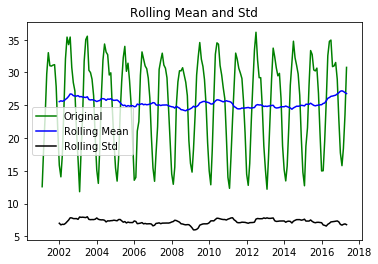

Augmented Dickey-Fuller test:
Test Statistic                  -1.438982
p-value                          0.563451
#Lags Used                      11.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
Critical Value (5%)             -2.877380
Critical Value (10%)            -2.575214
dtype: float64


In [46]:
#type(newdata['Temperature'])
stationarity_check(newdata['Temperature'])

#Week2:Also, write in detail about the insights you found while doing the analysis.
----------------------------------------------------------------------------------------------------------------------
Here we see that after performing the ADF test the P value is 0.56 (>0.05) and the test statistic value is within the critical value. Thus the ADF test fails to reject the null hypothesis and implies that the distribution is non-stationary.

#Week2 Write about the p-value, test statistic, critical values in detail and how are they important to determine stationarity
-------------------------------------------------- 

Critical value of a hypothesis test depends on the Significance level(alpha, usually chosen as 0.1, 0.05, 0.01 etc).
Critical values define the cut off of the regions where the test statistic is unlikely to lie. The null hypothesis test is rejected if the test statistic exceeds this critical values.
The p-value is the probability of the test statistic being at least as extreme as the one observed given that the null hypothesis is true. A small p-value is an indication that the null hypothesis is false.


#Week2:Write about steps that can be taken to make a time-series stationary
------------------------------------------------------------------------------
In order to make a time series a method called diffing is used. Here we take the difference between the data points and create a new time series. If the time series is still non stationary we can perform the diffing multiple times. But this makes the analysis more complex.

#week2:Understand the ADF test mathematically.
----------------------------------------------------------------------
ADF test is a hypothesis testing used to check if a time series is stationary. Here the null hypothesis is that the time series has uniroot (and hence the time series is non-stationary). If we reject the null hypothesis we say that the time series does not have uniroots and is stationary.
This is based on the fact that time series has a stochastic component and the stochastic prodess's characteristic equation is said to have uniroot if it has a root =1. And this indicates that the time series is not stationary. 